## Probability, Modeling and Simulation



We will do:

* numpy
* Describe a very simple model of coin tosses
* Coin tosses model simulation.
* The notion of a generative model
* Election model. Simulation. 
* Evaluation of the election model.


In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn.apionly as sns

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


## Hello Numpy

The Numpy array processing library is the basis of nearly all numerical computing in Python. Here's a 30 second crash course. 

In [4]:
print("Make a 3 row x 4 column array of random numbers")
x = np.random.random((3, 4))
print(x,"\n")
print("-----------------")
print("Get the element at row 1, column 2")
print(x[1, 2])

# The colon syntax is called "slicing" the array. 
print("Get the first row")
print(x[0, :])

print("Last 2 items in the first row")
print(x[0, -2:])

print("Get every 2nd item in the first row")
print(x[0, ::2])

Make a 3 row x 4 column array of random numbers
[[0.93171371 0.45953147 0.06238777 0.41162428]
 [0.36762427 0.65061796 0.95415365 0.62137172]
 [0.18123495 0.57167172 0.37554319 0.75973341]] 

-----------------
Get the element at row 1, column 2
0.9541536510036264
Get the first row
[0.93171371 0.45953147 0.06238777 0.41162428]
Last 2 items in the first row
[0.06238777 0.41162428]
Get every 2nd item in the first row
[0.93171371 0.06238777]


In [5]:
print("Max is  ", x.max())
print("Min is  ", x.min())
print("Mean is ", x.mean())

Max is   0.9541536510036264
Min is   0.06238777075204227
Mean is  0.5289340074972204


In [6]:
print(x.max(axis=1))

[0.93171371 0.95415365 0.75973341]


In [7]:
print(x.max(axis=0))

[0.93171371 0.65061796 0.95415365 0.75973341]


There are many ways to construct these arrays

In [8]:
thearray = np.array([1, 2, 3, 4, 5])
thearray.shape, thearray.dtype

((5,), dtype('int64'))

In [9]:
ones = np.ones(10, dtype="int64")
ones

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
ones_float = np.ones(10)
ones_float

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [12]:
np.empty((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Operations on numpy arrays are very different from those on regular python lists.

In [13]:
print("Add 1 to every element")
y = x + 1
x, y

Add 1 to every element


(array([[0.93171371, 0.45953147, 0.06238777, 0.41162428],
        [0.36762427, 0.65061796, 0.95415365, 0.62137172],
        [0.18123495, 0.57167172, 0.37554319, 0.75973341]]),
 array([[1.93171371, 1.45953147, 1.06238777, 1.41162428],
        [1.36762427, 1.65061796, 1.95415365, 1.62137172],
        [1.18123495, 1.57167172, 1.37554319, 1.75973341]]))

This notion of adding 1 to every element, by virtually creating an array of 1's is called **broadcasting**

In [14]:
int_ones_list = [1, 1, 1, 1, 1]
float_ones_list = [1., 1., 1., 1., 1.]
int_ones_list + float_ones_list

[1, 1, 1, 1, 1, 1.0, 1.0, 1.0, 1.0, 1.0]

This is not perhaps what you wanted....you might have wanted this

In [15]:
twos = ones + ones_float
ones, ones_float, twos

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]))

In [30]:
r = np.random.random(10)

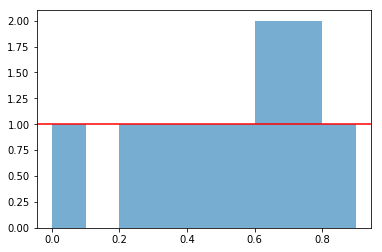

In [38]:
plt.hist(r,bins=np.arange(0.0,1.0,0.1),alpha=.6)
plt.axhline(1,0,1,color='r')

More broadcasting

In [32]:
r*2, r/2

(array([1.48231258, 1.04469274, 1.25414765, 1.27803336, 0.6625606 ,
        0.41102585, 0.03867119, 1.69192457, 1.54449977, 0.97448036]),
 array([0.37057815, 0.26117319, 0.31353691, 0.31950834, 0.16564015,
        0.10275646, 0.0096678 , 0.42298114, 0.38612494, 0.24362009]))

In [33]:
r*twos

array([1.48231258, 1.04469274, 1.25414765, 1.27803336, 0.6625606 ,
       0.41102585, 0.03867119, 1.69192457, 1.54449977, 0.97448036])

In [34]:
np.dot(r, twos)

10.382348669849616

We can also play with 2D arrays

In [35]:
my_array2d = np.array([ [1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12] ])
my_array2d

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [36]:
my_array2d.shape

(3, 4)

In [37]:
my_array2d[2, 3]

12

Slicing is supported in 2D arrays.

![](images/2dindex_v2.png)

In [39]:
x + my_array2d

array([[ 1.93171371,  2.45953147,  3.06238777,  4.41162428],
       [ 5.36762427,  6.65061796,  7.95415365,  8.62137172],
       [ 9.18123495, 10.57167172, 11.37554319, 12.75973341]])

In [40]:
threetwos = 2.0*np.ones(3)
threetwos

array([2., 2., 2.])

To put this in 2-D array form, we can use reshape:

In [41]:
threetwos.reshape(-1,1)

array([[2.],
       [2.],
       [2.]])

Now we can have some broadcasting fun

In [42]:
print(my_array2d)
my_array2d*threetwos.reshape(-1,1)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


array([[ 2.,  4.,  6.,  8.],
       [10., 12., 14., 16.],
       [18., 20., 22., 24.]])

You can transpose arrays

In [43]:
my_array2d.T

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [44]:
my_array2d.T*threetwos

array([[ 2., 10., 18.],
       [ 4., 12., 20.],
       [ 6., 14., 22.],
       [ 8., 16., 24.]])

Reshape is very general

In [45]:
my_array2d.reshape(4,3) #whats happening here?

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

### What is probability?

Suppose you were to flip a coin. Then you expect not to be able to say whether the next toss would yield a heads or a tails.  You might tell a friend that the odds of getting a heads is equal to to the odds of getting a tails, and that both are $1/2$.

This intuitive notion of odds is a **probability**. It comes about because of our physical **model** of the world: say that because of our faith in the U.S. Mint, we might be willing to, without having seen any tosses, say that the coin is fair. In other words, there are two choices, both of which are equally likely.

#### Symmetry 

Consider another example. If we were tossing a 'fair' six-sided dice, we may thus equivalently say that the odds of the dice falling on any one of its sides is $1/6$. Indeed if there are $C$ different equally likely possibilities, we'd expect that the probability of any one particular outcome would be $1/C$.

The examples of the coin as well as the dice illustrate the notion of probability springing from **symmetry**. Here we think of probability of of the number 4 on the dice as the ratio:

$$\frac{Number\: of\: cases\: for\: number\: 4}{number\: of\: possibilities} = \frac{1}{6},$$
 assuming equally likely possibilities.

In other words, the symmetry refers to the notion that when there are multiple ways for an event to happen, and that then we have an intuitive **model** of fairness between these ways that tells us that none of these are any more likely than the other. 

#### Probability from a model

But now think of an event like an election, say a presidential election. You cant exactly run multiple trials of the election: its a one-off event. But you still want to talk about the likelyhood of a candidate winning. However people do make **models** of elections, based on inputs such as race, age, income, sampling polls, etc. They assign likeyhoods of candidates winning and run large numbers of **simulations** of the election, making predictions based on that. Forecasters like Nate Silver, Sam Wang, And Drew Linzer, made incredibly successfull predictions of the 2012 elections.

Or consider what a weather forecaster means when he or she says there is a 90% chance of rain today. Presumably, this conclusion has been made from many computer **simulations** which take in the weather conditions known in the past, and propagated using physics to the current day. The simulations give different results based on the uncertainty in the measurement of past weather, and the inability of the physics to capture the phenomenon exactly (all physics is some approximation to the natural world). But 90% of these simulations show rain.

In all of these cases, there is either a model (a fair coin, an election forecasting model, a weather differential equation), or an experiment ( a large number of coin tosses) that is used to **estimate** a probability, or the odds, of an **event** $E$ occuring. 

#### Combining models and observations

In all of these cases, probability is something we speak of, for observations we are to make in the future. And it is something we assign, based on the *model* or belief of the world we have, or on the basis of past observations that we have made, or that we might even imagine that we would make.

Consider some additional examples. You might ask the probability of the Yankees winning the next baseball game against the Red Sox. Or you might ask for the probability of a launch failure for the next missile protecting Tel-Aviv. These are not academic questions: lots of betting money and lives depend upon them respectively. In both cases there is some past data, and some other inputs such as say, weather conditions, which might be used to construct a model, which is then used to predict the fate of the next game or launch. 

They key takeaway is this: for some reasons, and possibly using some data, we have constructed a model of the universe. In other words, we have combined **prior** beliefs and past frequencies respectively. This notion of such combination is yet another notion of probability, called the **Bayesian** notion of probability. And we can now use this model to make predictions, such us the future odds of a particular event happening.

### Testing a model

We can test this model by having carried out a large number of coin flips. You would do, or imagine doing, a large number of flips or **trials** $N$, and finding the number of times you got heads $N_H$. Then the probability of getting heads would be 
$$\frac{N_H}{N}.$$

#### Probability as frequency

This is the notion of probability as a **relative frequency**: if there are multiple ways an **event** like the tossing of a coin can happen, lets look at multiple trials of the event and see the fraction of times one or other of these ways happened. 

#### Simulating the results of the model

We dont have a coin right now. So let us **simulate** this process on a computer. To do this we will use a form of the **random number generator** built into `numpy`. In particular, we will use the function `np.random.choice`, which will with equal probability for all items pick an item from a list (thus if the list is of size 6, it will pick one of the six list items each time, with a probability 1/6). 

In [52]:
def throw_a_coin(N):
    return np.random.choice(['H','T'], size=N)
throws=throw_a_coin(40)
print("Throws:"," ".join(throws))
print("Number of Heads:", np.sum(throws=='H'))
print("p1 = Number of Heads/Total Throws:", np.sum(throws=='H')/40.)

Throws: T T T T T T T T H H H H H T H H T H T H H T H T H T H T H H T H H H T T T T H H
Number of Heads: 20
p1 = Number of Heads/Total Throws: 0.5


In [53]:
np.mean(throws == 'T')

0.5

Notice that you do not necessarily get 20 heads.

Now say that we run the entire process again, a second **replication** to obtain a second sample. Then we ask the same question: what is the fraction of heads we get this time? Lets call the odds of heads in sample 2, then, $p_2$:

In [54]:
throws=throw_a_coin(40)
print("Number of Heads:", np.sum(throws=='H'))
print("p1 = Number of Heads/Total Throws:", np.sum(throws=='H')/40.)

Number of Heads: 20
p1 = Number of Heads/Total Throws: 0.5


In [55]:
throws=throw_a_coin(10000)
print("Number of Heads:", np.sum(throws=='H'))
print("p1 = Number of Heads/Total Throws:", np.sum(throws=='H')/10000.)

Number of Heads: 4961
p1 = Number of Heads/Total Throws: 0.4961


As you can see, the larger number of trials we do, the closer we seem to get to half the tosses showing up heads. Lets see this more systematically. We'll use `np.arange` which gives us a grid:

In [56]:
np.arange(10), np.arange(10,20), np.arange(10,20, 2)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 array([10, 12, 14, 16, 18]))

We are going to do many more trials. Pay attention to the plotting commands as well.

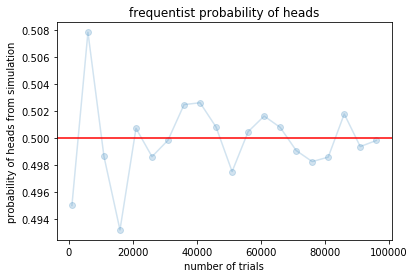

In [60]:
trials=np.arange(1000, 100000, 5000)
plt.plot(trials, [np.sum(throw_a_coin(j)=='H')/np.float(j) for j in trials], 'o-', alpha=0.2);
plt.axhline(0.5, 0, 1, color='r');
plt.xlabel('number of trials');
plt.ylabel('probability of heads from simulation');
plt.title('frequentist probability of heads');

Thus, the true odds **fluctuate** about their long-run value of 0.5, in accordance with the model of a fair coin (which we encoded in our simulation by having `np.random.choice` choose between two possibilities with equal probability), with the fluctuations becoming much smaller (we shall talk a lot more about this later in the book). These **fluctations** are what give rise to probability distributions.

Each finite length run is called a **sample**, which has been obtained from the **generative** model of our fair coin. Its called generative as we can use the model to generate, using simulation, a set of samples we can play with to understand a model. Such **simulation from a model** is a key technique which we will come back to again and again in learning from data.

### The rules of probability

We have seen multiple notions of probability so far. One might assign probabilities based on symmetry, for eg, 2 sides of a fair coin, or six sides of a fair dice. One might assign probabilities based on doing an experiment. such as the long run number of heads in many coin flips. One might assign probabilities based on beliefs; and one might even assign probabilities to events that have no chance of repeating, such as the 2012 presidential election, or the probability of rain between 2pm and 6pm today.

Thus, the very definition of probability seems to be wishy-washy and subjective. Thus you might wonder how you might work with such probabilities. For this, we turn to the rules of probability.

The rules dont care where our probabilities come from, as to how we estimated them, as long as they behave in intuitively sensible ways. 

Consider an example: 

E is the event of getting a heads in a first coin toss, and F is the same for a second coin toss. Here $\Omega$, the set of all possibilities that can happen when you toss two coins is $\{HH, HT, TH, TT\}$. Since E only specifies that the first toss is heads, $E=\{HT, HH\}$. Similarly $F= {HH, TH}$ The set of all events that are not E then is $\tilde{E} = {TH, TT}$.

These sets, along with some others are captured in the venn diagram below:

![2 coin toss venn diagram](images/venn.png) 

The critical notions of probability are:

**Something must happen**

$$P(\Omega) =1$$

**Complementary events must have probabilities summing to 1**

Either E happened or didnt. So,

$$P(E) + P(\sim E) = 1$$

**The Multiply/And/Intersection Formula for independent events**: If E and F are independent events, the probability of both events happening together $P(EF)$ or $P(E \cap F)$ (read as E and F or E intersection F, respectively) is the multiplication of the individual probabilities.

$$ P(EF) = P(E) P(F) .$$

If you made the two independent coin tosses in our example, and you had a fair coin, the probability of both coming up heads is $(1/2)*(1/2) = 1/4$. This makes intuitive sense: half the time the first coin comes up heads, and then 1/2 the time the second coin comes up heads, so its 1/4 of the times that both come up heads.


**The Plus/Or/Union Formula** 

We can now ask the question, what is $P(E+F)$, the odds of E alone, F alone, or both together. Translated into English, we are asking, whats the probability that only the first toss was heads, or only the second toss was heads, or that both came up heads?  Or in other words, what are the odds of at least one heads? The answer to this question is given by the rule:

$$P(E+F) = P(E) + P(F) - P(EF),$$ 

the "plus" formula, where E+F, read as E or F (also $E \cup F$, reads as E union F) means "E alone, F alone, **or** both together". This rule is a hard one to understand and has a lot of notation, so lets examine it in some detail.

There are four ways that these two tosses can arrange themselves, as illustrated by this diagram.

![2 coin flips](images/2flips.png) 

We can have a HH, HT, TH, or TT. In three out of 4 of these cases, either the first toss was heads, or the second was heads. Thus $P(E+F)=3/4$. 

The formula says, add the odds that "the first toss was a heads, without worrying about the second one (1/2), to the probability that the second toss was a heads, without worrying about the first one" (1/2). Since this double counts the situation where both are heads; subtract that (1/4):

\begin{eqnarray*}
P(E+F) \, & = &\, P(E) + P(F) - P(EF)\\
\frac{3}{4} \, & = &\, \frac{1}{2} + \frac{1}{2} - \frac{1}{4} 
\end{eqnarray*}


### A simple Election Model

In the last section, we made a simple simulation of a coin-toss on the computer from a fair-coin model which associated equal probability with heads and tails. Let us consider another model here, a table of probabilities that [PredictWise](http://www.predictwise.com/results/2012/president) made on October 2, 2012 for the US presidential elections. 
PredictWise aggregated polling data and, for each state, estimated the probability that the Obama or Romney would win. Here are those estimated probabilities:

In [61]:
predictwise = pd.read_csv('data/predictwise.csv').set_index('States')
predictwise.head()

,Obama,Romney,Votes
States,,,
Alabama,0.000,1.000,9
Alaska,0.000,1.000,3
Arizona,0.062,0.938,11
Arkansas,0.000,1.000,6
California,1.000,0.000,55


Each row is the probability predicted by Predictwise that Romney or Obama would win a state. The votes column lists the number of electoral college votes in that state. 

Remember that simulation is used in different ways in the modelling process. Simulations might be used to propagate differential equations which describe the weather from different initial conditions. In this case they are used to create the model. In the coin flips case, they are used to illustrate the predictions of the model of a fair coin. This example is in the same spirit: we are given a (somehow obtained) list of win probabilities for the states of the US. 
Later on in this book we will explore some approaches to estimating probabilities like these and quatifying our uncertainty about them. But for the time being, we will focus on how to make a prediction assuming these probabilities are known.

Lets plot a map of the probability that Obama wins each state, according to this prediction.

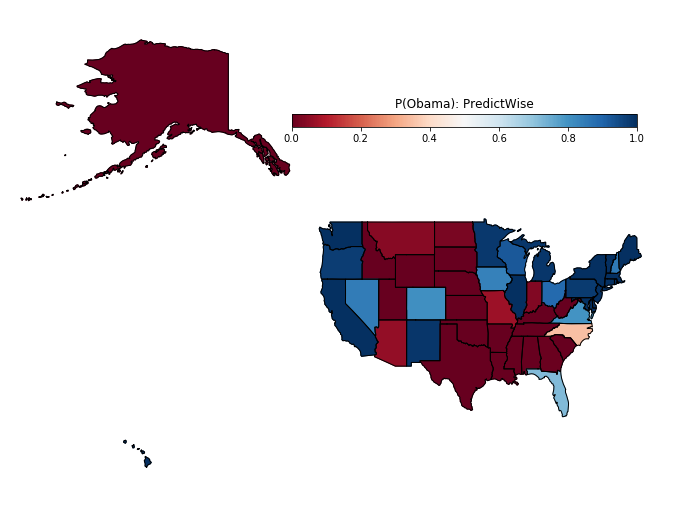

In [63]:
from statesplot import make_map, load_states_geom
s2p = load_states_geom("data/us-states.json")
make_map(s2p, predictwise.Obama, "P(Obama): PredictWise");

You might be tempted from seeing this map to wonder why Romney ever thought he would win this election. But lets be patient: remember these are just probabilities, and this is our model of the election as of October 12th, 2012.

In the case of the tossed coins, even though we had a model which said that the probability of heads was 0.5, there were sequences of flips in which more or less than half the flips were heads. Similarly, here, if the probability of Romney winning in Arizona is 0.938, it means that if somehow, there were 1000 replications with an election each, Romney would win in 938 of those Arizonas **on the average** across the replications. And there would be some samples with Romney winning more, and some with less. We can run these **simulated** universes on a computer though not in real life.

#### Simulating the model

To do this, 
we will assume that the outcome in each state is the result of an independent coin flip whose probability of coming up Obama is given by the Predictwise state-wise win probabilities. Lets write a function `simulate_election` that uses this **predictive model** to simulate the outcome of the election given a table of probabilities.

In the code below, each column simulates a single outcome from the 50 states + DC by choosing a random number between 0 and 1. Obama wins that simulation if the random number is $<$ the win probability. If he wins that simulation, we add in the electoral votes for that state, otherwise we dont. We do this `n_sim` times and return a list of total Obama electoral votes in each simulation.

In [64]:
def simulate_election(model, n_sim):
    simulations = np.random.uniform(size=(51, n_sim))
    obama_votes = (simulations < model.Obama.values.reshape(-1, 1)) * model.Votes.values.reshape(-1, 1)
    #summing over rows gives the total electoral votes for each simulation
    return obama_votes.sum(axis=0)

Lets unpack this function a bit, as a lot goes on.

First we decide to make, say 100 simulations. We'll create 51 rows of 100 random numbers (100 columns) between 0 and 1

In [69]:
sims = np.random.uniform(size=(51, 100))
print(sims.shape)
sims

(51, 100)


array([[0.48143646, 0.14536827, 0.48693162, ..., 0.61295945, 0.60317047,
        0.49681379],
       [0.12490603, 0.67320229, 0.71097572, ..., 0.19946905, 0.54283702,
        0.8631579 ],
       [0.64163666, 0.31962941, 0.09080718, ..., 0.79161337, 0.39509602,
        0.45591733],
       ...,
       [0.15910907, 0.34691147, 0.73537062, ..., 0.02293867, 0.20676494,
        0.83913932],
       [0.4135769 , 0.12697651, 0.6408861 , ..., 0.76405367, 0.77106391,
        0.22141112],
       [0.0015382 , 0.98344561, 0.44949702, ..., 0.90901579, 0.25603417,
        0.85622738]])

Now, consider the sixth row, or sixth state, Colorado

In [70]:
print(predictwise.iloc[5])
sims[5,:]

Obama     0.807
Romney    0.193
Votes     9.000
Name: Colorado, dtype: float64


array([0.54627691, 0.89534331, 0.84614827, 0.18190009, 0.73716856,
       0.01279027, 0.8363068 , 0.91695967, 0.44890583, 0.08144489,
       0.63097618, 0.45314001, 0.05697699, 0.7319655 , 0.22086297,
       0.41442513, 0.16466522, 0.28641478, 0.92476564, 0.32386878,
       0.94279071, 0.89449878, 0.88018537, 0.49491243, 0.07702344,
       0.90087729, 0.25212555, 0.72873679, 0.86740681, 0.0024795 ,
       0.1254691 , 0.54967559, 0.2677285 , 0.15851233, 0.95546363,
       0.61924552, 0.15535963, 0.99112258, 0.20897761, 0.90903229,
       0.21373378, 0.93483039, 0.75086251, 0.42152397, 0.52603467,
       0.0523026 , 0.62921447, 0.8678542 , 0.18023124, 0.19372581,
       0.11871329, 0.46850838, 0.48126152, 0.92828032, 0.98411086,
       0.58771595, 0.69869111, 0.96780024, 0.90898227, 0.73168817,
       0.34264765, 0.0671833 , 0.7976031 , 0.56994576, 0.02715054,
       0.29720799, 0.98544984, 0.38074041, 0.4353697 , 0.82101127,
       0.46123753, 0.28261297, 0.44848369, 0.98351538, 0.07082

With an Obama probability of about 0.8, This means that if I threw down random numbers between 0 and 1 **uniformly**, about 80% should be below 0.8. So we can pick the simulations in which Obama wins Colorado by seeing in how many of the simulations the random number thrown is less than 0.8

In [71]:
sims[5,:] < predictwise.loc['Colorado'].Obama

array([ True, False, False,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False, False, False,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True, False,  True, False,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
       False,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True, False,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True])

This is a boolean numpy array. Summing coerces the True to 1 and False to 0 and gives us the total number of simulations

In [72]:
np.sum(sims[5,:] < predictwise.loc['Colorado'].Obama)

74

And the fraction from the mean:

In [73]:
np.mean(sims[5,:] < predictwise.loc['Colorado'].Obama)

0.74

Lets do it for all the states now. 51 rows of 100 trues and Falses

In [76]:
sims < predictwise.Obama.values.reshape(-1,1) # reshape for broadcasting

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [ True,  True,  True, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False]])

Multiply by the number of electoral Votes in each state

In [75]:
(sims < predictwise.Obama.values.reshape(-1,1))*predictwise.Votes.values.reshape(-1,1)

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [10, 10, 10, ..., 10, 10, 10],
       [ 0,  0,  0, ...,  0,  0,  0]])

If I sum the columns now, I get the total electoral votes in the country for Obama in each simulation

In [77]:
np.sum((sims < predictwise.Obama.values.reshape(-1,1))*predictwise.Votes.values.reshape(-1,1), axis=0)

array([313, 288, 323, 314, 325, 332, 338, 285, 285, 303, 318, 293, 322,
       322, 329, 337, 328, 309, 317, 347, 294, 323, 299, 333, 322, 309,
       319, 331, 321, 297, 294, 326, 335, 341, 326, 343, 332, 320, 347,
       323, 322, 323, 308, 337, 329, 303, 325, 319, 301, 311, 332, 332,
       357, 348, 294, 290, 328, 310, 295, 347, 314, 322, 303, 314, 319,
       337, 310, 347, 328, 323, 297, 306, 319, 310, 303, 332, 307, 325,
       335, 341, 332, 316, 348, 303, 318, 300, 297, 313, 341, 322, 314,
       323, 312, 332, 360, 308, 332, 332, 313, 326])

This is how `simulate_election` works.

The following code takes the necessary probabilities for the Predictwise data, and runs 10000 simulations. If you think of this in terms of our coins, think of it as having 51 biased coins, one for each state, and tossing them 10,000 times each.

We use the results to compute the number of simulations, according to this predictive model, that Obama wins the election (i.e., the probability that he receives 269 or more electoral college votes)

In [78]:
result = simulate_election(predictwise, 10000)
print(type(result))
np.sum(result >= 269)

<class 'numpy.ndarray'>


9956

There are roughly only 50 simulations in which Romney wins the election!

#### Displaying the prediction

Now, lets visualize the simulation. We will build a histogram from the result of `simulate_election`. We will **normalize** the histogram by dividing the frequency of a vote tally by the number of simulations. We'll overplot the "victory threshold" of 269 votes as a vertical black line and the result (Obama winning 332 votes) as a vertical red line.

We also compute the number of votes at the 5th and 95th quantiles, which we call the spread, and display it (this is an estimate of the outcome's uncertainty). By 5th quantile we mean that if we ordered the number of votes Obama gets in each simulation in increasing order, the 5th quantile is the number below which 5\% of the simulations lie. 

We also display the probability of an Obama victory    
    

In [79]:
def plot_simulation(simulation):    
    plt.hist(simulation, bins=np.arange(200, 538, 1), 
             label='simulations', align='left', normed=True)
    plt.axvline(332, 0, .5, color='r', label='Actual Outcome')
    plt.axvline(269, 0, .5, color='k', label='Victory Threshold')
    p05 = np.percentile(simulation, 5.)
    p95 = np.percentile(simulation, 95.)
    iq = int(p95 - p05)
    pwin = ((simulation >= 269).mean() * 100)
    plt.title("Chance of Obama Victory: %0.2f%%, Spread: %d votes" % (pwin, iq))
    plt.legend(frameon=False, loc='upper left')
    plt.xlabel("Obama Electoral College Votes")
    plt.ylabel("Probability")
    sns.despine()

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


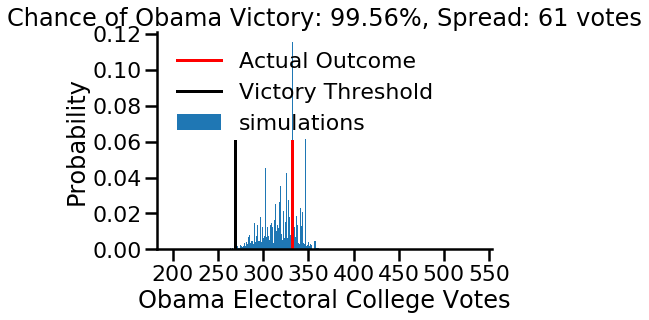

In [80]:
with sns.plotting_context('poster'):
    plot_simulation(result)

The model created by combining the probabilities we obtained from Predictwise with the simulation of a biased coin flip corresponding to the win probability in each states leads us to obtain a histogram of election outcomes. We are plotting the probabilities of a prediction, so we call this distribution over outcomes the **predictive distribution**. Simulating from our model and plotting a histogram allows us to visualize this predictive distribution. In general, such a set of probabilities is called a **probability distribution** or **probability mass function**. 

### Evaluating and Validating our Prediction

The point of creating a probabilistic predictive model is to simultaneously make a forecast and give an estimate of how certain we are about it. Let us **evaluate** our prediction to get a sense of how useful it is, and we **validate** the predictive model by comparing it to real data.

However, in order to trust our prediction or our reported level of uncertainty, the model needs to be *correct*. We say a model is *correct* if it honestly accounts for all of the mechanisms of variation in the system we're forecasting. Another way of thinking about this is that the predictive distribution matches the true distribution of election outcomes when the information leading up to the election matches the information that we have now.

In general a model is never entirely correct: it is just an approximation to the underlying natural phenomenon. However it might be correct enough to be useful: our simple model of a fair coin is one such example where we've substituted subtle notions of the weight distributions of a coin or trust in the US mint by a simple number, 0.5.

#### Accuracy and precision

Suppose that we believe the model is correct "enough". Under this assumption, we can evaluate our prediction by characterizing its **accuracy** and **precision**.

Accuracy refers to the closeness of our predictions to the true result, while precision refers to the uncertainty about our predicted value. Thus, to evaluate the accuracy of our prediction, we can check to see whether the center of mass of our predictive distribution seems to match the true outcome.  So, based on the outcome we observed, the model seems accurate. To make a more rigorous statement about accuracy, we would want to have more replications (that is, more elections) to see whether the expectation of the predictive distribution consistently matches the true outcomes. 

To evaluate the **precision** of our prediction,  we look at the spread of the histogram, which is 60 votes, and relatively large. Because we are assuming the model is correct, we can interpret the spread of the histogram as a measure of the variability among the election outcomes that are consistent with the information we have. Whether the prediction is precise *enough* is a question of what you want to do with your prediction. For example, it is not if you want to be able to call the winner of a close election (say the candidates are separated by less than 30 votes), this prediction would not be precise enough to identify a winner with a lot of confidence. To handle this, we might wish to incorporate more information into the model to reduce the spread of likely election outcomes. 

On the other hand, what we are really trying to do is to see if Romney has any chance of winning by Obama not exceeding the 269 votes threshold. For this purpose the precision is good enough; the win threshold is way outside the spread!

![m:](images/avp1.jpg)

![m:accuracy vs precision](images/avp2.jpg)